# Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Data

In [14]:
file_path=r'C:\Users\Ahmed Ashraf\Desktop\computer and information system\Route AI\Eng.Basma Reda\Session 9-20240216T232915Z-001\Session 9\Assignment 6\train.csv'
df=pd.read_csv(file_path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

# Count missing values in each column

In [16]:
missing_values=df.isnull().sum()
all_miss=missing_values[missing_values>0]
sorted_missing_values=all_miss.sort_values()
sorted_missing_values

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<Axes: >

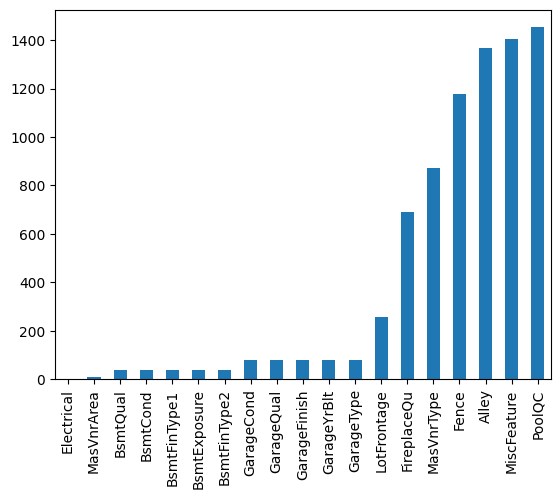

In [17]:
sorted_missing_values.plot(kind='bar')

# Feature Engineering

Check fields with large missing data from the description:


*   PoolQC means Pool Quality and NA means No Pool (it is not a missing value and it will impact the peroformance). You will notice that values are (Ex	Excellent, Gd	Good, TA	Average/Typical, Fa	Fair, NA	No Pool). The order here make sense
*   Find and replace is the best approach in this case





In [18]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [19]:
df['PoolQC'].fillna('NA' , inplace=True)

In [20]:
df['PoolQC'].value_counts()

PoolQC
NA    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64


*   MiscFeature includes: Elev	Elevator, Gar2	2nd Garage (if not
described in garage section), Othr	Other, Shed	Shed (over 100 SF), TenC	Tennis Court, NA	None
*    Replacing NA with the most frequent term does not make sense here
*    We can use None as a separate category
*    One hot encoding will be a good choice here



In [21]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [24]:
df['MiscFeature'].fillna('NA' , inplace=True)

In [25]:
df['MiscFeature'].value_counts()

MiscFeature
NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

Alley: Type of alley access to property. The field values are defined as:
*   Grvl	Gravel
*   Pave	Paved
*   NA 	No alley access

Similar to MiscFeature, we can use None as a separate category and One hot encoding will be a good choice here

In [26]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [27]:
df['Alley'].fillna('NA' , inplace=True)

Fence: Fence quality.  The field values are defined as
*   GdPrv	Good Privacy
*   MnPrv	Minimum Privacy
*   GdWo	Good Wood
*   MnWw	Minimum Wood/Wire
*   NA	No Fence

We will use the above technique      

In [29]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [30]:
df['Fence'].fillna('NA' , inplace=True)

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


We will use find and replace


In [31]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [32]:
df['FireplaceQu'].fillna('NA' , inplace=True)

The last item is the lot frontage (واجهة الشارع).Linear feet of street connected to property.


We may use the median in this case


In [42]:
df['LotFrontage'].fillna(df['LotFrontage'].median() , inplace=True)

In [43]:
df['LotFrontage'].isna().sum()

0

In [37]:
# Similarly, we fix GarageCond using find and replace


# for GarageType, NA means no garage

# for MasVnrType  Masonry veneer type, None means no Maonry veneer


# for Area, can can use the median


# for Electrical, we can use the most frequent label (gets index 0).


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [38]:
df['GarageCond'].unique()


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [39]:
df['GarageCond'].fillna('NA' , inplace=True)

In [40]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [41]:
df['MasVnrType'].fillna('None' , inplace=True)

In [44]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median() , inplace=True)

In [45]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [46]:
df['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [47]:
df['Electrical'].fillna('SBrkr' , inplace=True)

In [23]:
# we completed these with large number of missing values, let's replace

#fill NAN values as well


Check missing values one more time

In [48]:
missing_values=df.isnull().sum()
all_miss=missing_values[missing_values>0]
sorted_missing_values=all_miss.sort_values()
sorted_missing_values

BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
dtype: int64

We can do similar analysis to transform other features such as HeatingQC, ExterQual, etc. (try it yourself)

# Missing data test



In [138]:
file_path=r'C:\Users\Ahmed Ashraf\Desktop\computer and information system\Route AI\Eng.Basma Reda\Session 9-20240216T232915Z-001\Session 9\Assignment 6\train.csv'
df=pd.read_csv(file_path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [139]:
mis_value=df.isnull().sum()
sorted_mis=mis_value[mis_value>0]
sorted_missing=sorted_mis.sort_values
sorted_missing

<bound method Series.sort_values of LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64>

# Encoding

In [140]:
categorical_col=df.select_dtypes(include=['object']).columns
encoded_df=pd.get_dummies(df , columns=categorical_col , dtype='int')
encoded_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [141]:
encoded_df.isna().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 289, dtype: int64

In [142]:
encoded_df.fillna('0' , inplace=True)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_17236\2916905146.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  encoded_df.fillna('0' , inplace=True)


# First Model

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error , classification_report

In [144]:
x=encoded_df.drop(['SalePrice' , 'Id'] , axis=1)
y=encoded_df['SalePrice']

In [145]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.3 , random_state=42)

In [146]:
#Check
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (438, 287)
Y_Test Shape =  (438,)
X_Train Shape =  (1022, 287)
Y_Train Shape =  (1022,)


In [147]:
lr_model=LinearRegression()

In [148]:
lr_model.fit(x_train , y_train)

LinearRegression()

In [149]:
y_pred=lr_model.predict(x_test)

In [152]:
print('Mean absolute error' , mean_absolute_error(y_test , y_pred))

Mean absolute error 25969.546020075573


In [153]:
print('Mean squared error' , mean_squared_error(y_test , y_pred))

Mean squared error 17400814009.78358


In [154]:
print('Root squared error' ,np.sqrt( mean_squared_error(y_test , y_pred)))

Root squared error 131912.14504276542


In [155]:
print('R2 square error' , r2_score(y_test , y_pred))

R2 square error -1.4936343084391712
